In [9]:
!pip install imutils

import os
import re
import cv2
import math

import numpy as np
import matplotlib.pyplot as plt
import importlib

# files
import utils
import synteticDS
# import dataset 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
# Load the dataset

train_data_path= "../../data/imgs/artificial/"
circle_img_paths=[]
blob_img_paths=[]
# shard_img_paths=[]
fibers_img_paths=[]
all_img_paths=[]
for root, dirs, files in os.walk(train_data_path, topdown=False):
    for name in files:
        if re.findall('particleCutouts.*.jpg', root+name):  
            imgPath = os.path.join(root,name)
            if re.findall('fibers', imgPath):
                fibers_img_paths.append(imgPath) 
            elif re.findall('blobs', imgPath):
                blob_img_paths.append(imgPath)        
            elif re.findall('circles', imgPath):
                circle_img_paths.append(imgPath)    
all_img_paths.append(fibers_img_paths) 
all_img_paths.append(blob_img_paths) 
all_img_paths.append(circle_img_paths)
if not all_img_paths:
    print("err loading ",train_data_path)
else:
    print("circles ",len(circle_img_paths))    
    print("blobs ",len(blob_img_paths))    
    print("fibers ",len(fibers_img_paths))

circles  843
blobs  41
fibers  681


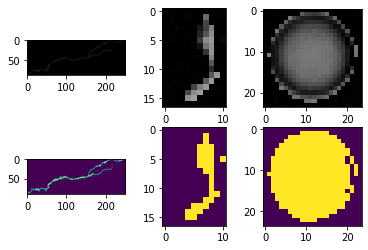

(89, 250, 3)


In [4]:
fig, axarr = plt.subplots(2,3)

for idx, classList in enumerate(all_img_paths):
    image = cv2.imread(classList[0])
    imageMask = utils.getMask(image,threshold=4,kernelSize=1) 
    # listContours = markContours(imageMask) 
#     imgContours = utils.img2segmented(imageMask)
    
#     axarr[idx].imshow(imgContours)
    axarr[0][idx].imshow(image)
    axarr[1][idx].imshow(imageMask)
    
plt.show()
#     a=np.unique(imgContours)
print(cv2.imread(fibers_img_paths[0]).shape)

30
(1080, 1920, 3)


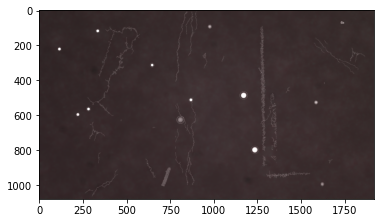

In [47]:
import copy 
importlib.reload(synteticDS)

numberOfParticles= 30  #randint(0, 50)
imgPaths=  list(itertools.chain.from_iterable(all_img_paths)) 

particle_examples = random.choices(imgPaths, k=numberOfParticles)
print(numberOfParticles)

imgBgPaths= synteticDS.getPaths("../../data/imgs/wafer/in/")
background = synteticDS.backgroundFrameMean(imgBgPaths)
print(background.shape)

# genImg,segMasks = generate_image(particle_examples, numberOfParticles, background)
genImg,segMasks = synteticDS.generate_image(particle_examples, numberOfParticles, background)
plt.imshow(genImg)
plt.show()   
    

In [ ]:
# TODO masks to coco
# TODO segMaskCombine
# save (cocoView, segMaskCombine, genImage) -> send to F,A,E



In [ ]:
for i in range(20):
    
    genImg,segMasks = synteticDS.generate_image(particle_examples, numberOfParticles, background)
    plt.imshow(genImg)
    plt.show()   

2 (2, 5) (2, 2)


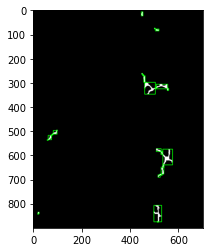

In [82]:
image = cv2.imread(all_img_paths[0][0])
imageMask = utils.getMask(image,threshold=100,kernelSize=10) 
contours = cv2.findContours(imageMask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE) # img, contours, hierarchy

labelsCount, _, values, centroids=  cv2.connectedComponentsWithStats(imageMask) 
print(labelsCount, values.shape, centroids.shape)

contoursImg = np.zeros(image.shape, dtype=np.uint8)
axSize = math.sqrt(labelsCount)
fig, axarr = plt.subplots(1,3)

for i,cnt in enumerate(contours[0]): # iterate through contours
    if i > 0:  # skip background
        contour = cnt.squeeze()
        """ coco features """
#         image0 = np.zeros(image.shape, dtype=np.uint8)

        moments = cv2.moments(contour)
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
        
        BBox = cv2.boundingRect(contour)  # cv2.rectangle(contoursImg,(BBox[0],BBox[1]),(BBox[0]+BBox[2],BBox[1]+BBox[3]),(0,255,0),2)
        area = cv2.contourArea(contour)
        
        cv2.rectangle(contoursImg,(BBox[0],BBox[1]),(BBox[0]+BBox[2],BBox[1]+BBox[3]),(0,255,0),2)
        contoursImg = cv2.drawContours(contoursImg, contours[0],i,(255,255,255), thickness=cv2.FILLED)


plt.imshow(contoursImg)
plt.show()
    

# plot_intensity_histogram(image) 

In [ ]:
if ( h/w ratio >x || <x) || contour length/convex hull ratio